# 1. Problem Statement

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

# 2. Inputs Provided

Provided the data in csv file format and it has the following columns.

- longitude                      : (signed numeric - float) : Longitude value for the block in California, USA
- latitude                       : (numeric - float ) : Latitude value for the block in California, USA
- housing_median_age             : (numeric - int ) : Median age of the house in the block
- total_room                     : (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
- total_bedrooms                 : (numeric - float ) : Count of the total number of bedrooms in all houses in the block
- population                     : (numeric - int ) : Count of the total number of population in the block
- households                     : (numeric - int ) : Count of the total number of households in the block
- median_income                  : (numeric - float ) : Median of the total household income of all the houses in the block
- ocean_proximity                : (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
- median_house_value             : (numeric - int ) : Median of the household prices of all the houses in the block

# 3. Analysis Tasks to be performed

### 3.1. Build a model of housing prices to predict median house values in California using the provided dataset

Before building the model, need to Load the data, Handle missing values, Encode categorical data, Split the dataset, Standardize data and then create the model which will trained in section 3.2 below.

#### 3.1.a. Load the data 

In [1]:
# Import libraries required for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the data & verify or see the 1st 5 records in the dataset
housing = pd.read_excel('housing.xlsx')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# Get the information of the data set
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# Shape of the data set
housing.shape

(20640, 10)

In [5]:
# Number of records in the dataset
num_rec_before = housing.shape[0]
num_rec_before

20640

#### 3.1.b. Handle missing values

In [6]:
# Find out the missing data
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

It can be seen that the 'total_bedrooms' column has missing values and all other columns does not have any missing values.

In [7]:
# What is the % of missing values in the column 'total_bedrooms'
(housing.isnull().sum()/housing.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

It is only 1.003% of record does have missing values. So, these can be dropped as they may not impact the final out come of the model creation and its predictions.

In [8]:
# Drop the missing values
housing.dropna(inplace=True)

In [9]:
# Number of records in data set after dropping the missing values
num_rec_after = housing.shape[0]
num_rec_after

20433

In [10]:
# Total records dropped for missing values
num_rec_before - num_rec_after

207

In [11]:
# Verify missing values in dataset finally
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

It can be seen that all the missing data is handled.

#### 3.1.c. Encode categorical data

In [12]:
# FInd the categorical columns in the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null int64
total_rooms           20433 non-null int64
total_bedrooms        20433 non-null float64
population            20433 non-null int64
households            20433 non-null int64
median_income         20433 non-null float64
ocean_proximity       20433 non-null object
median_house_value    20433 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


It can be seen that 'ocean_proximity' column is the only one categorical column the dataset.

In [14]:
# Find unique values in this column
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
# Find number of unique values in this column
housing['ocean_proximity'].unique().shape[0]

5

In [16]:
# Encode the categorical data into numberic by using getdummies function
housing = pd.get_dummies(housing, drop_first=True)

In [17]:
# Verify the dataset for categorical data
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20433 non-null float64
latitude                      20433 non-null float64
housing_median_age            20433 non-null int64
total_rooms                   20433 non-null int64
total_bedrooms                20433 non-null float64
population                    20433 non-null int64
households                    20433 non-null int64
median_income                 20433 non-null float64
median_house_value            20433 non-null int64
ocean_proximity_INLAND        20433 non-null uint8
ocean_proximity_ISLAND        20433 non-null uint8
ocean_proximity_NEAR BAY      20433 non-null uint8
ocean_proximity_NEAR OCEAN    20433 non-null uint8
dtypes: float64(4), int64(5), uint8(4)
memory usage: 1.6 MB


In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


It can be seen that all are numeric values and no categorical data.

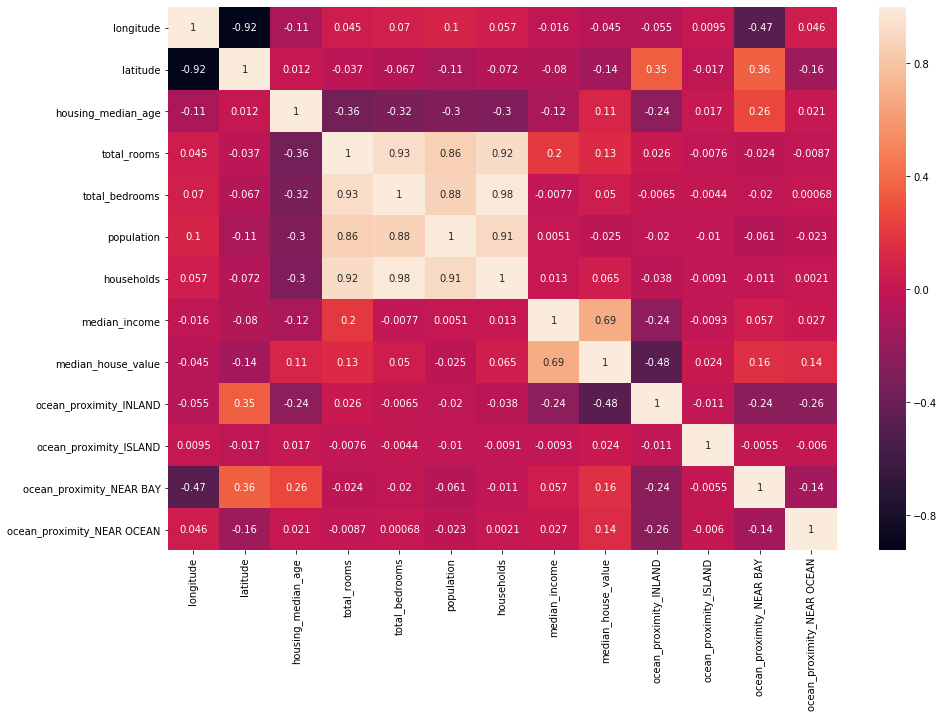

In [19]:
# Correlation matrix in the form of heat map
fig_hm = plt.figure(figsize=(15,10))
ax_hm = fig_hm.add_subplot(111)
corrMatrix = housing.corr()
sns.heatmap(corrMatrix, annot=True)

It can be seen from the above heat map that the "median_house_value" column is relatively highly correlated with "median_income" column with 0.69 correlation. And this also is not a strong correlation coefficient.

#### 3.1.d. Split the dataset

In [20]:
# Extract input (X) and output (Y) data from the dataset
X = housing.drop(['median_house_value'],axis=1)
Y = housing[['median_house_value']]

In [21]:
# Split the data into 80% training dataset and 20% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 3.1.e. Standardize data

In [22]:
# Standardize training and test datasets 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 3.1.f Create & train the model to learn from the data to predict the median housing price in any district, given all the other metrics 

In [23]:
# Creating the linear regression model
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predict output for test dataset using the fitted model
y_pred=np.round(lrm.predict(X_test),1)

In [25]:
# Create the temp Dataframe to hold the actual housing values and predicted housing values
df_temp = y_test.reset_index(drop=True).join(pd.DataFrame(y_pred))
df_temp.columns = ['Actual House Value', 'Predicted House Value']
df_temp

,Actual House Value,Predicted House Value
0,245800,201883.0
1,137900,147279.7
2,218200,207796.6
3,220800,180487.6
4,170500,190323.9
...,...,...
4082,500001,272515.2
4083,157900,182200.5
4084,100200,110229.9
4085,127700,137315.7


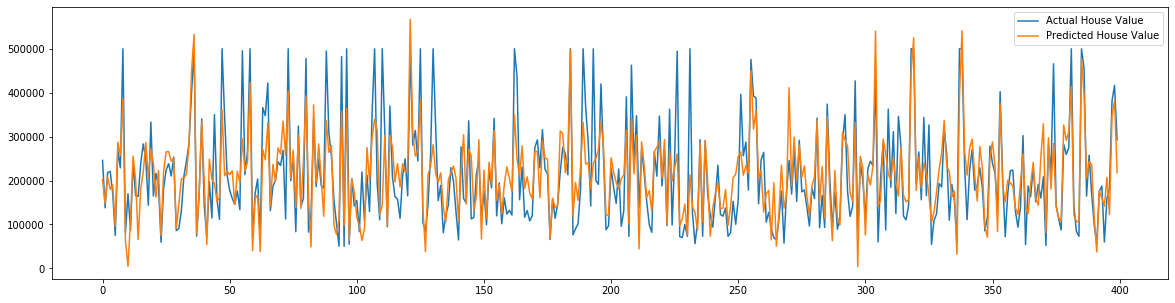

In [26]:
# Verify the accuracy of the predicted values with respect to the actual values
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(df_temp['Actual House Value'][0:400], label='Actual House Value')
ax.plot(df_temp['Predicted House Value'][0:400], label='Predicted House Value')
ax.legend()

From the above plot it looks like the predictions are following closely with the actual values.

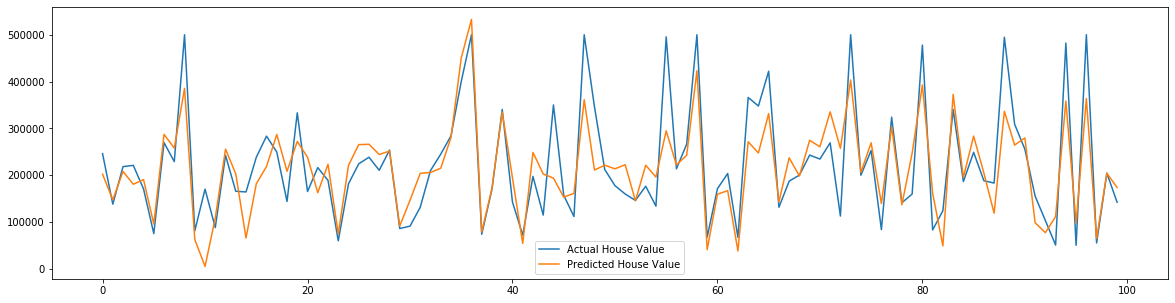

In [27]:
# ZOOM in the 1st 100 values 
fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(111)
ax1.plot(df_temp['Actual House Value'][0:100], label='Actual House Value')
ax1.plot(df_temp['Predicted House Value'][0:100], label='Predicted House Value')
ax1.legend()

After closer look at the actual & predicted values it can be seen that even though the predicted values are following the actual values, there are instance where the predicted value are considerably far from the actual values.

In [28]:
# Here is the error in prediction
df_temp['Error'] = df_temp['Actual House Value'] - df_temp['Predicted House Value']
df_temp['Error in %'] = (df_temp['Actual House Value'] - df_temp['Predicted House Value'])*100 / df_temp['Actual House Value']
df_temp

,Actual House Value,Predicted House Value,Error,Error in %
0,245800,201883.0,43917.0,17.866965
1,137900,147279.7,-9379.7,-6.801813
2,218200,207796.6,10403.4,4.767828
3,220800,180487.6,40312.4,18.257428
4,170500,190323.9,-19823.9,-11.626921
...,...,...,...,...
4082,500001,272515.2,227485.8,45.497069
4083,157900,182200.5,-24300.5,-15.389804
4084,100200,110229.9,-10029.9,-10.009880
4085,127700,137315.7,-9615.7,-7.529914


It can be seen from the above table that the error % is +ve and _ve also. Which means that the predicted values are more/less than the actual values by the error value mentioed in the above table for all teh records in the table. Conversion of these error values in % is the error in % column.

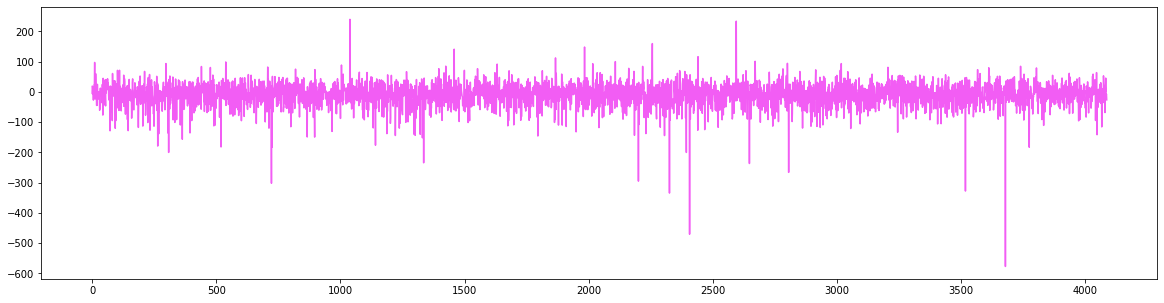

In [29]:
# Plot the error %
fig2 = plt.figure(figsize=(20,5))
ax2 = fig2.add_subplot(111)
ax2.plot(df_temp['Error in %'], color='#f25df4')

From the above plot it can be seen that the error in % is mostly spread between -100% to 100%. ZOOM in and see this fact in the following detailed values and plot.

In [30]:
# Min, Average, Max error in %
print("Min of 'Error in %' is {0}\nAVerage of 'Error in %' is {1}\nMax of 'Error in %' is {2}\n".
      format(np.round(df_temp['Error in %'].min(), 1), 
             np.round(df_temp['Error in %'].mean(), 1),
             np.round(df_temp['Error in %'].max(),1)))

Min of 'Error in %' is -576.9
AVerage of 'Error in %' is -9.7
Max of 'Error in %' is 239.6



(-100, 100)

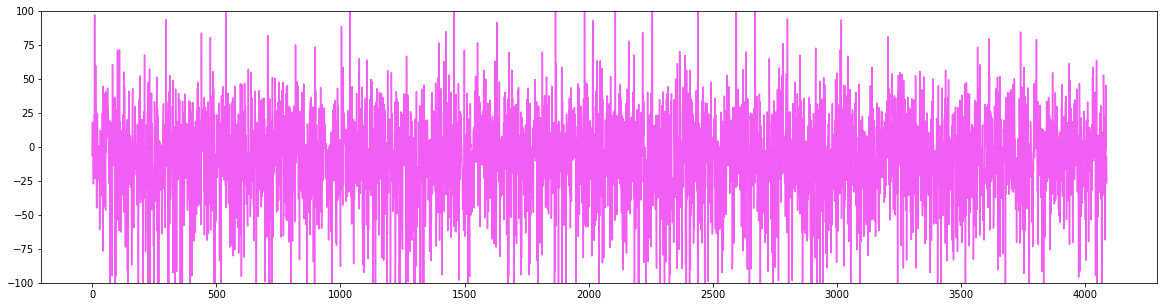

In [31]:
# ZOOM in the erro % plot to visualize it more closely
fig3 = plt.figure(figsize=(20,5))
ax3 = fig3.add_subplot(111)
ax3.plot(df_temp['Error in %'], color='#f25df4')
ax3.set_ylim([-100,100])

Try to understand and plot the error in % spread within the different % error. Also plot the same.

In [32]:
for per in range(5,41,5):
    x = df_temp[(df_temp['Error in %'] >= -per) & (df_temp['Error in %'] <= per)]['Error in %'].count()
    y = np.round(100*df_temp[(df_temp['Error in %'] >= -per) & 
            (df_temp['Error in %'] <= per)]['Error in %'].count()/df_temp['Error in %'].count(), 2)
    print("No. of records which hase +/- {0}% are {1} and {2}% of total predicted records\n".format(per, x, y))

No. of records which hase +/- 5% are 513 and 12.55% of total predicted records

No. of records which hase +/- 10% are 1022 and 25.01% of total predicted records

No. of records which hase +/- 15% are 1463 and 35.8% of total predicted records

No. of records which hase +/- 20% are 1908 and 46.68% of total predicted records

No. of records which hase +/- 25% are 2306 and 56.42% of total predicted records

No. of records which hase +/- 30% are 2642 and 64.64% of total predicted records

No. of records which hase +/- 35% are 2936 and 71.84% of total predicted records

No. of records which hase +/- 40% are 3169 and 77.54% of total predicted records



Text(0, 0.5, '% of error within +/- error % mentioned on X-axis')

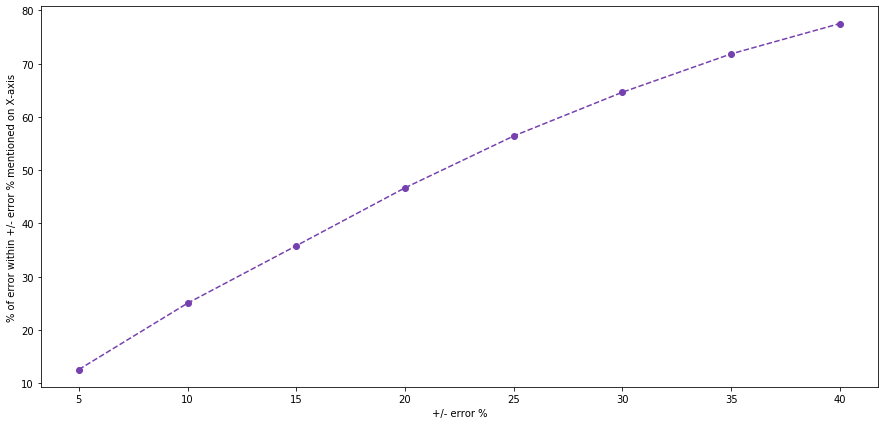

In [33]:
# Calculate the error % out of all the predicted records and plot it
x = list()
y = list()
for per in range(5,41,5):
    x.append(per)
    y.append(np.round(100*df_temp[(df_temp['Error in %'] >= -per) & 
            (df_temp['Error in %'] <= per)]['Error in %'].count()/df_temp['Error in %'].count(), 2))
    
fig4 = plt.figure(figsize=(15,7))
ax4 = fig4.add_subplot(111)
ax4.plot(x, y, 'go--', color='#7641af')
ax4.set_xlabel("+/- error %")
ax4.set_ylabel("% of error within +/- error % mentioned on X-axis")

It can bee seen from the above plot that with the 40% tolerance in the prediction error 77.54% of the prediction are predicted correctly. In the similar lines:
- Achieving 77.54% accuracy with allowed 40% prediction error (i.e.; predicted value may be 40% away from the actual value)
- Achieving 71.84% accuracy with allowed 35% prediction error (i.e.; predicted value may be 35% away from the actual value)
- Achieving 64.64% accuracy with allowed 30% prediction error (i.e.; predicted value may be 30% away from the actual value)

In [34]:
# Verify accuracy of the model from MAE & MSE
MAE=mean_absolute_error(y_test,pd.DataFrame(y_pred))
MSE=mean_squared_error(y_test,pd.DataFrame(y_pred))
print("Mean Absolute Error is ", np.round(MAE,2))
print("\nRoot Mean Squared Error", np.round(np.sqrt(MSE),2))

Mean Absolute Error is  50413.43

Root Mean Squared Error 69297.72


### 3.2. Predict housing prices based on median_income and plot the regression chart for it

####  3.2.a. Extract just the median_income column from the independent variables (from X_train and X_test)

In [35]:
# get median_income from given data set & split the data into test and train data
X_1 = housing[['median_income']]
Y_1 = housing[['median_house_value']]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

In [36]:
# Standardize training and test datasets 
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.transform(X_test_1)

#### 3.2.b. Perform Linear Regression to predict housing values based on median_income and Predict output for test dataset using the fitted model

In [37]:
# Creating the linear regression model
lrm1 = LinearRegression()
lrm1.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Predict output for test dataset using the fitted model
y_pred_1 = np.round(lrm1.predict(X_test_1),1)

In [39]:
# Create the temp Dataframe to hold the actual housing values and predicted housing values
df_temp_1 = y_test_1.reset_index(drop=True).join(pd.DataFrame(y_pred_1))
df_temp_1.columns = ['Actual House Value', 'Predicted House Value']
df_temp_1

,Actual House Value,Predicted House Value
0,245800,177965.1
1,137900,232380.4
2,218200,179631.0
3,220800,165781.9
4,170500,216285.1
...,...,...
4082,500001,195279.6
4083,157900,184440.8
4084,100200,151815.9
4085,127700,190515.8


#### 3.2.c. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

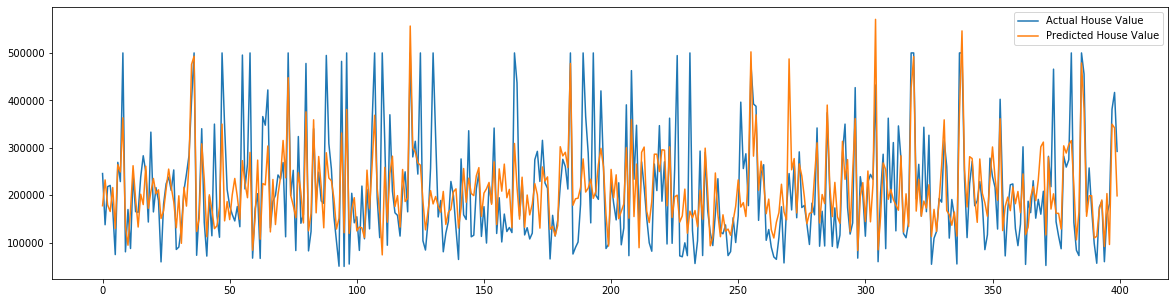

In [40]:
# Verify the accuracy of the predicted values with respect to the actual values
fig5 = plt.figure(figsize=(20,5))
ax5 = fig5.add_subplot(111)
ax5.plot(df_temp_1['Actual House Value'][0:400], label='Actual House Value')
ax5.plot(df_temp_1['Predicted House Value'][0:400], label='Predicted House Value')
ax5.legend()

From the above plot it looks like the predictions are following closely with the actual values.

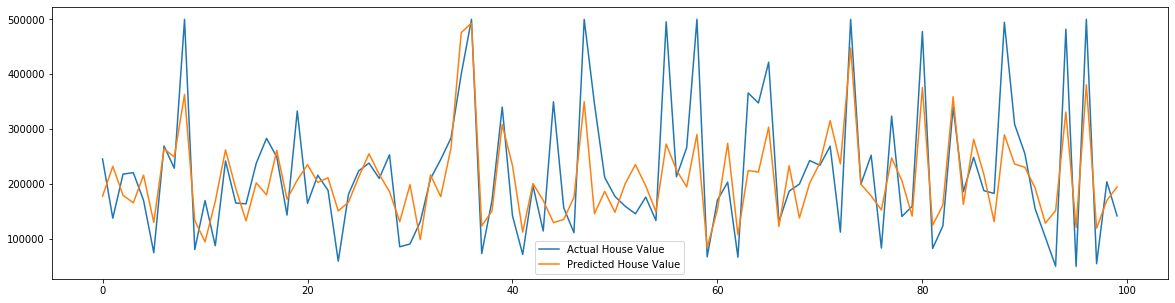

In [41]:
# ZOOM in the 1st 100 values 
fig6 = plt.figure(figsize=(20,5))
ax6 = fig6.add_subplot(111)
ax6.plot(df_temp_1['Actual House Value'][0:100], label='Actual House Value')
ax6.plot(df_temp_1['Predicted House Value'][0:100], label='Predicted House Value')
ax6.legend()

After closer look at the actual & predicted values it can be seen that even though the predicted values are following the actual values, there are instance where the predicted value are considerably far from the actual values.

In [42]:
# Here is the error in prediction
df_temp_1['Error'] = df_temp_1['Actual House Value'] - df_temp_1['Predicted House Value']
df_temp_1['Error in %'] = (df_temp_1['Actual House Value'] - 
                           df_temp_1['Predicted House Value'])*100 / df_temp_1['Actual House Value']
df_temp_1

,Actual House Value,Predicted House Value,Error,Error in %
0,245800,177965.1,67834.9,27.597600
1,137900,232380.4,-94480.4,-68.513706
2,218200,179631.0,38569.0,17.675985
3,220800,165781.9,55018.1,24.917618
4,170500,216285.1,-45785.1,-26.853431
...,...,...,...,...
4082,500001,195279.6,304721.4,60.944158
4083,157900,184440.8,-26540.8,-16.808613
4084,100200,151815.9,-51615.9,-51.512874
4085,127700,190515.8,-62815.8,-49.190133


It can be seen from the above table that the error % is +ve and _ve also. Which means that the predicted values are more/less than the actual values by the error value mentioed in the above table for all teh records in the table. Conversion of these error values in % is the error in % column.

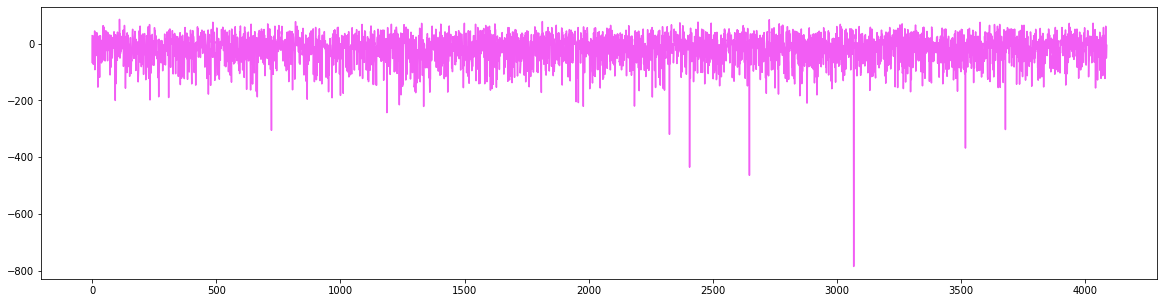

In [43]:
# Plot the error %
fig7 = plt.figure(figsize=(20,5))
ax7 = fig7.add_subplot(111)
ax7.plot(df_temp_1['Error in %'], color='#f25df4')

From the above plot it can be seen that the error in % is mostly spread between -150% to 100%. ZOOM in and see this fact in the following detailed values and plot.

In [44]:
# Min, Average, Max error in %
print("Min of 'Error in %' is {0}\nAVerage of 'Error in %' is {1}\nMax of 'Error in %' is {2}\n".
      format(np.round(df_temp_1['Error in %'].min(), 1), 
             np.round(df_temp_1['Error in %'].mean(), 1),
             np.round(df_temp_1['Error in %'].max(),1)))

Min of 'Error in %' is -784.8
AVerage of 'Error in %' is -19.3
Max of 'Error in %' is 85.1



(-200, 100)

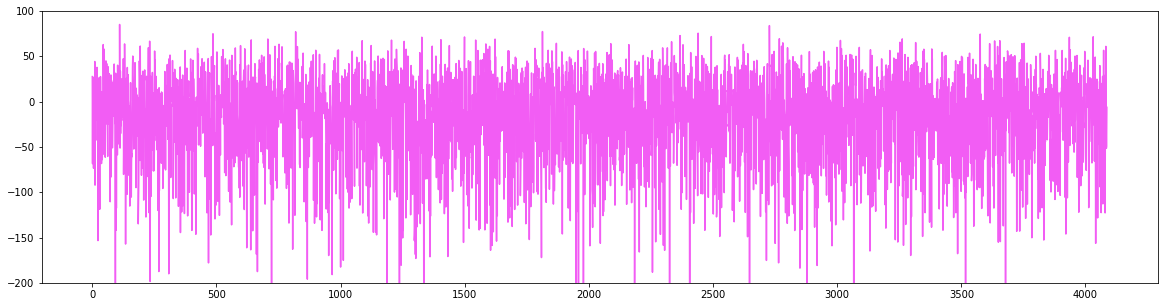

In [45]:
# ZOOM in the erro % plot to visualize it more closely
fig8 = plt.figure(figsize=(20,5))
ax8 = fig8.add_subplot(111)
ax8.plot(df_temp_1['Error in %'], color='#f25df4')
ax8.set_ylim([-200,100])

Try to understand and plot the error in % spread within the different % error. Also plot the same.

In [46]:
for per in range(5,41,5):
    x = df_temp_1[(df_temp_1['Error in %'] >= -per) & (df_temp_1['Error in %'] <= per)]['Error in %'].count()
    y = np.round(100*df_temp_1[(df_temp_1['Error in %'] >= -per) & 
            (df_temp_1['Error in %'] <= per)]['Error in %'].count()/df_temp_1['Error in %'].count(), 2)
    print("No. of records which hase +/- {0}% are {1} and {2}% of total predicted records\n".format(per, x, y))

No. of records which hase +/- 5% are 434 and 10.62% of total predicted records

No. of records which hase +/- 10% are 829 and 20.28% of total predicted records

No. of records which hase +/- 15% are 1220 and 29.85% of total predicted records

No. of records which hase +/- 20% are 1556 and 38.07% of total predicted records

No. of records which hase +/- 25% are 1874 and 45.85% of total predicted records

No. of records which hase +/- 30% are 2174 and 53.19% of total predicted records

No. of records which hase +/- 35% are 2428 and 59.41% of total predicted records

No. of records which hase +/- 40% are 2654 and 64.94% of total predicted records



In [47]:
# Calculate the error % out of all the predicted records and plot it
x_1 = list()
y_1 = list()
for per in range(5,41,5):
    x_1.append(per)
    y_1.append(np.round(100*df_temp_1[(df_temp_1['Error in %'] >= -per) & 
            (df_temp_1['Error in %'] <= per)]['Error in %'].count()/df_temp_1['Error in %'].count(), 2))

Text(0, 0.5, '% of error within +/- error % mentioned on X-axis')

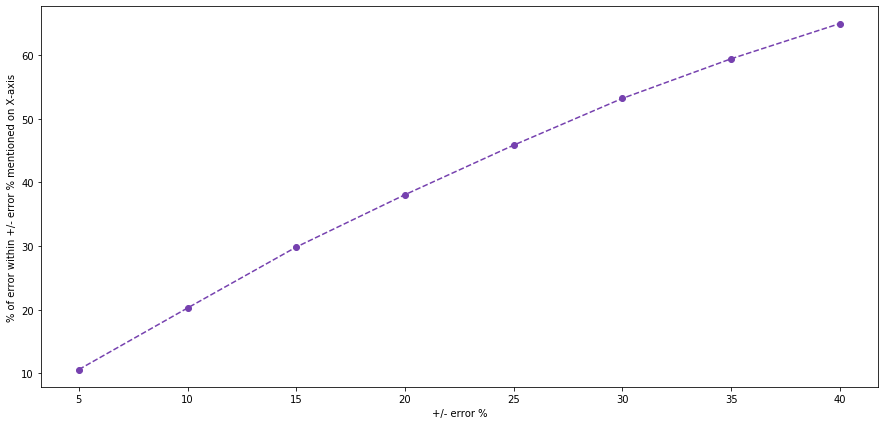

In [48]:
# Plot the error % 
fig9 = plt.figure(figsize=(15,7))
ax9 = fig9.add_subplot(111)
ax9.plot(x_1, y_1, 'go--', color='#7641af')
ax9.set_xlabel("+/- error %")
ax9.set_ylabel("% of error within +/- error % mentioned on X-axis")

It can bee seen from the above plot that with the 40% tolerance in the prediction error 64.94% of the prediction are predicted correctly. In the similar lines:
- Achieving 64.94% accuracy with allowed 40% prediction error (i.e.; predicted value may be 40% away from the actual value)
- Achieving 59.41% accuracy with allowed 35% prediction error (i.e.; predicted value may be 35% away from the actual value)
- Achieving 53.19% accuracy with allowed 30% prediction error (i.e.; predicted value may be 30% away from the actual value)

In [49]:
# Verify accuracy of the model from MAE & MSE
MAE=mean_absolute_error(y_test_1,pd.DataFrame(y_pred_1))
MSE=mean_squared_error(y_test_1,pd.DataFrame(y_pred_1))
print("Mean Absolute Error is ", np.round(MAE,2))
print("\nRoot Mean Squared Error", np.round(np.sqrt(MSE),2))

Mean Absolute Error is  63374.55

Root Mean Squared Error 84976.53


## Conclusion:

- Even though the "median_income" column is relatively more correlated with "median_house_value" column with the correlation coefficient value of 0.69, the model created from only "median_income" column as the input is NOT performing better than the model created from all the variable (columns) considered as input.
- The reason for above observation may be stems from the fact that the correlation between the variables "median_income" & "median_house_value" is NOT so strong.